#### PROBLEM STATEMENT:

The problem is that the Bank Marketing campaigns of a Portuguese banking institution need to identify the factors that cause the customers to tend to take the subscription, as well as Bank Marketing campaigns of a Portuguese banking institution need to identify the reasons behind the customer which make them not take the subscription.

##### Aim:

You aim to Determinate/Analysis factors for the subscription and nonsubscription. Using the ITP and NPV techniques find the below questions.


##### DATASET DESCRIPTION:

Bank Marketing: The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact with the same client was required to assess if the product (bank term deposit) would be (or not) subscribed.

QUESTIONS TO SOLVE:

Check Point 1:

1. Import data set


In [84]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Load data set
bank_data = pd.read_csv("./bank.csv")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


2. Make the data proper to make use of data for analysis

- Identify the Features data types before entering into the analysis
- Convert the datatypes which are wrongly identified according to the business(domain). Kindly use the User Defined function and loop to convert the data types once.
- Find and Remove missing if any. Use visualization to find the missing values or Use general method to find the missing values.
-  Find duplicates (if necessary)

In [14]:
# Shape of the Data set
print("shape:",bank_data.shape)

# Look into the Data Types of the data Set
print("Data Columns Info:")
bank_data.info()

shape: (4521, 17)
Data Columns Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [11]:
# Find Missing values in the Data Set
print("missing values: \n",bank_data.isnull().sum())

missing values: 
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#### Understandings of the DataFrame
* From the Previous Cell Out put and the Nature of the Data set we can come to a conclusion that we do not have any missing values in the Data set. though we have unknown values in some of the columns, they expected values so they can be considered as valid values.
* We have following columns **'default','housing','loan' and 'y'** having values either yes or no and this can be converted to boolean data type.
* and will convert the **balance** column to floating point.

In [16]:
# function to convert columns to boolean
def convert_to_boolean(column):
    bank_data[column] = bank_data[column].replace('yes', True)
    bank_data[column] = bank_data[column].replace('no', False)
    bank_data[column] = bank_data[column].astype('bool')

columns_to_convert = ['default', 'housing', 'loan', 'y']

for col in columns_to_convert:
    convert_to_boolean(col)

#convert the balance column to float data type.
bank_data.balance = bank_data.balance.astype('float64')

bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,False,1787.0,False,False,cellular,19,oct,79,1,-1,0,unknown,False
1,33,services,married,secondary,False,4789.0,True,True,cellular,11,may,220,1,339,4,failure,False
2,35,management,single,tertiary,False,1350.0,True,False,cellular,16,apr,185,1,330,1,failure,False
3,30,management,married,tertiary,False,1476.0,True,True,unknown,3,jun,199,4,-1,0,unknown,False
4,59,blue-collar,married,secondary,False,0.0,True,False,unknown,5,may,226,1,-1,0,unknown,False


In [17]:
# Find the Duplicated records
bank_data.duplicated().sum() # we don't have any duplicated records in the data set.

0

In [18]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


#### Check Point 2

PERFORM DATA ANALYSIS

1. Find the average balance of the customer who belongs to the subscribed customer and non-subscribed customer and also use a related plot to show them in visualization.

In [21]:
bank_data.groupby('y')['balance'].aggregate('mean')

y
False    1403.211750
True     1571.955854
Name: balance, dtype: float64

Text(0.5, 1.0, 'Avg Bal Vs Subscription')

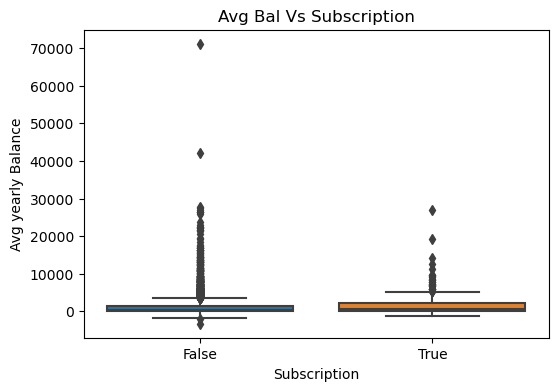

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(bank_data, x='y', y='balance')
plt.xlabel("Subscription")
plt.ylabel("Avg yearly Balance")
plt.title('Avg Bal Vs Subscription')

Observations -->

By Looking at the Above the Box Chart the Data set have couple of values which may fall under out of the box, those values or records needs to be avoided to achive good results with current data set. because most of the customers avg balance lies under 10k euro's

2. Use a pie plot to find the distribution(frequency) of the education. Make sure to add labels and show the percentage of each education distribution.

Text(0.5, 1.0, 'Distribution of Customers over the Education')

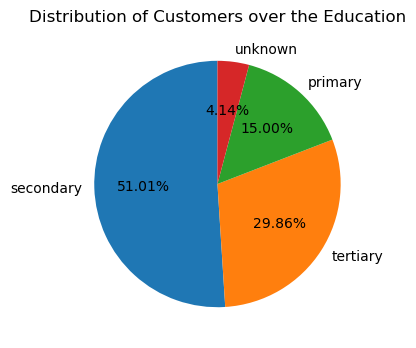

In [35]:
data = bank_data.education.value_counts()
plt.figure(figsize=(4,4))
plt.pie(x=data.values, labels=data.index, autopct='%.2f%%', startangle=90)
plt.title("Distribution of Customers over the Education")

3. Create a function that should be able to create a new feature(Variable) called season using the month column.

In [36]:
def season(month):
  if month in ['dec', 'jan', 'feb']:
    return 'Winter'
  elif month in ['mar', 'apr', 'may']:
    return 'Summer'
  elif month in ['jun', 'jul', 'aug']:
    return 'Rainy'
  else:
    return 'Monsoon'

bank_data['season'] = [season(month) for month in bank_data['month']]
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,season
0,30,unemployed,married,primary,False,1787.0,False,False,cellular,19,oct,79,1,-1,0,unknown,False,Monsoon
1,33,services,married,secondary,False,4789.0,True,True,cellular,11,may,220,1,339,4,failure,False,Summer
2,35,management,single,tertiary,False,1350.0,True,False,cellular,16,apr,185,1,330,1,failure,False,Summer
3,30,management,married,tertiary,False,1476.0,True,True,unknown,3,jun,199,4,-1,0,unknown,False,Rainy
4,59,blue-collar,married,secondary,False,0.0,True,False,unknown,5,may,226,1,-1,0,unknown,False,Summer


4. Use the count plot with a variable that you created in the above question and also the Y variable to find the class distribution.

Text(0, 0.5, 'Frequency of Customers')

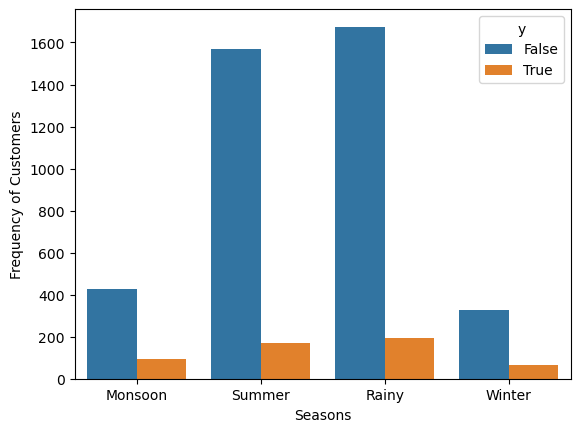

In [47]:
sns.countplot(bank_data, x='season', hue='y')
plt.xlabel("Seasons")
plt.ylabel('Frequency of Customers')

5. Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot.

Text(0, 0.5, 'No of days from last contact')

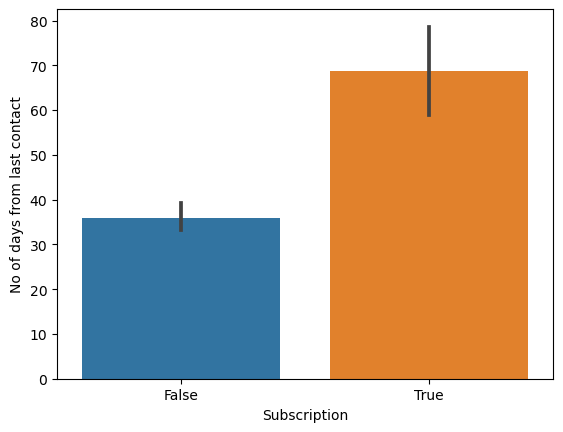

In [60]:
sns.barplot(bank_data, x='y', y='pdays')
plt.xlabel('Subscription')
plt.ylabel('No of days from last contact')

Text(0, 0.5, 'No of days from last contact')

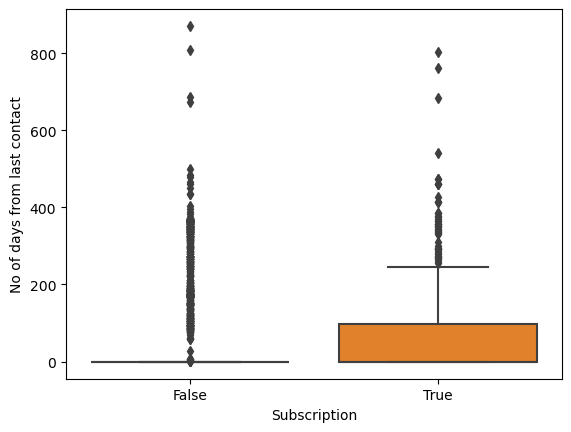

In [61]:
sns.boxplot(bank_data, x='y', y='pdays')
plt.xlabel('Subscription')
plt.ylabel('No of days from last contact')

In [63]:
bank_data[bank_data.y == False].pdays.describe()

count    4000.000000
mean       36.006000
std        96.297657
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       871.000000
Name: pdays, dtype: float64

Observations -->
By looking into the Box Plot of Previous contact days and Subscription, and the description of previous cell, there is huge effect on Subscription with last contacted days. like The cutomers with -1 values on the  P-Days column and it has impacted much on Subscription due to non contact / too many calls made to customer to cancel their subscription

In [68]:
# 6. Replace the -1 as nan values for the P-days store.
bank_data.pdays = bank_data.pdays.replace(-1, np.nan)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,season
0,30,unemployed,married,primary,False,1787.0,False,False,cellular,19,oct,79,1,NaN,0,unknown,False,Monsoon
1,33,services,married,secondary,False,4789.0,True,True,cellular,11,may,220,1,339.0,4,failure,False,Summer
2,35,management,single,tertiary,False,1350.0,True,False,cellular,16,apr,185,1,330.0,1,failure,False,Summer
3,30,management,married,tertiary,False,1476.0,True,True,unknown,3,jun,199,4,NaN,0,unknown,False,Rainy
4,59,blue-collar,married,secondary,False,0.0,True,False,unknown,5,may,226,1,NaN,0,unknown,False,Summer


7. Once you are done with question number 6, do the same analysis as question number 5. And observe the difference between question number 5 and question number 7.


Text(0, 0.5, 'No of days from last contact')

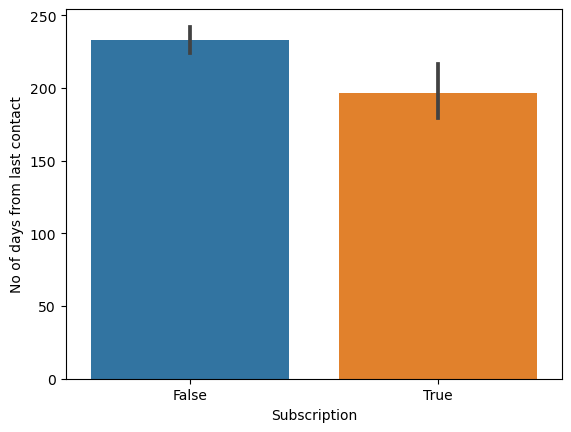

In [66]:
sns.barplot(bank_data, x='y', y='pdays')
plt.xlabel('Subscription')
plt.ylabel('No of days from last contact')

Observations -->
Post modifying the data set with -1 to NaN, Distribution plots indicate that the due to non connectivity with the customer compared to subscribed customers they were not subscribed to Term Deposit. even the same thing indicates in the box plot in below.

Text(0, 0.5, 'No of days from last contact')

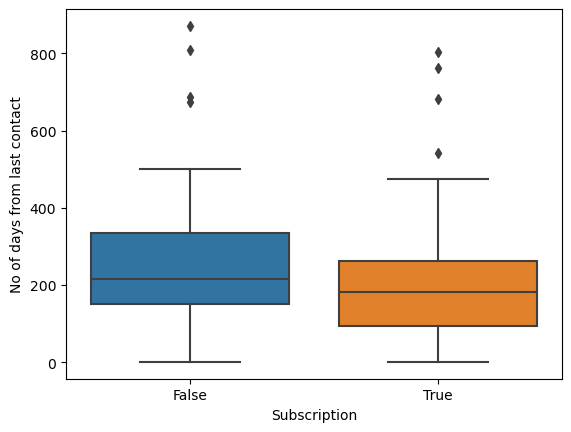

In [67]:
sns.boxplot(bank_data, x='y', y='pdays')
plt.xlabel('Subscription')
plt.ylabel('No of days from last contact')

8. Does the customer take the term subscription who has less than 0 balance?

Text(0.5, 1.0, 'Negative balance VS Subscription')

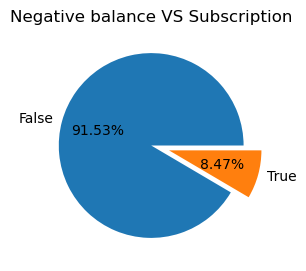

In [76]:
data = bank_data[bank_data.balance < 0]['y'].value_counts()
data

plt.figure(figsize=(3,3))
plt.pie(x=data.values, labels=data.index, autopct='%.2f%%', explode=[0, 0.2])
plt.title("Negative balance VS Subscription")

Observations -->

Does the customer take the term subscription who has less than 0 balance?  No. but we have few customers in a margin of **8.5** percent customers who have subscribed to the Term Deposit this can be considered outlier values. because majority of the Customers have not taken the Subscription who have negative balance on their yearly Avg balanace.

In [78]:
# 9. Use Pivot table to find the maximum balance for each type of job.
bank_data.pivot_table(index='job', values=['balance'], aggfunc='max')

,balance
job,
admin.,22171.0
blue-collar,16353.0
entrepreneur,42045.0
housemaid,26965.0
management,27359.0
retired,71188.0
self-employed,16430.0
services,26394.0
student,11555.0


10. Use the Age, balance, and Y column to plot the scatter plot and find what kind of relationship Age and balance had, and See the points which belong 0 and 1 class and how they are distributed.

Text(0, 0.5, 'Avg Yearly Balance')

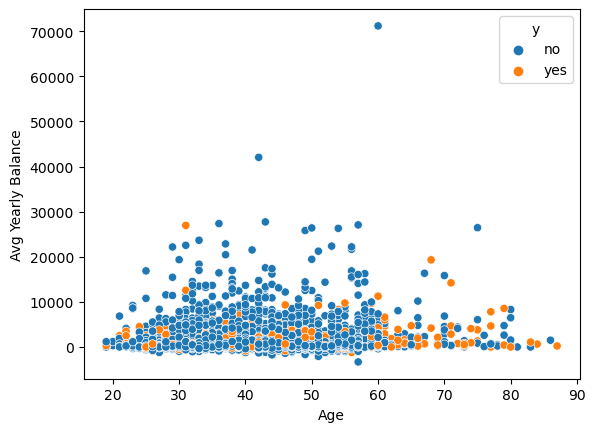

In [86]:
sns.scatterplot(bank_data, x='age', y='balance', hue='y')
plt.xlabel('Age')
plt.ylabel('Avg Yearly Balance')


Observations -->

From the above chart, that defines like the age group above **60** are Subscribed, compared to 

In [13]:
def remove_quotes(text):
    return text.replace('"', '') if isinstance(text, str) else text

bank_data = pd.read_csv('bank.csv') 
# we don't have quotes in the data set and even the row values are seperated with "," not the ;.
# so just reading CSV file is enough, incase if we have mention the delimiter we can do it with delimiter=';' or sep=';' into read csv method
bank_data = bank_data.applymap(remove_quotes) # apply method is used to modify values in the dataset
bank_data = bank_data.map(lambda value: None if (isinstance(value, str) and value == "unknown") else value) #  Refactor the data to include the Null values in place of unknown set the None value.

# bank_data["pdays"] = [None if v == -1 else v for v in bank_data.pdays] # the Pdays column is having integer data type and it should contain non zero values but it is having values with -1 which are Null values convert them to NaN
bank_data

C:\Users\lokesh\AppData\Local\Temp\ipykernel_14824\3194130506.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(remove_quotes) # apply method is used to modify values in the dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,NaN,0,None,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339.0,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330.0,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,None,3,jun,199,4,NaN,0,None,no
4,59,blue-collar,married,secondary,no,0,yes,no,None,5,may,226,1,NaN,0,None,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,NaN,0,None,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,None,9,may,153,1,NaN,0,None,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,NaN,0,None,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211.0,3,other,no


2. Inspect Data Types
- Check the data types of all columns in the DataFrame.

In [8]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [14]:
bank_data.isnull().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays        3705
previous        0
poutcome     3705
y               0
dtype: int64

In [18]:
duplicate_rows_count = len(bank_data) - len(bank_data.drop_duplicates())

print(f"Total duplicate rows: {duplicate_rows_count}")

Total duplicate rows: 0
